In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading in the data
churn = pd.read_csv('/Users/gregory/Desktop/data_mining_2/Projects/Project_4/Data/telco_churn_data_clean.csv')

churn.head()

,Unnamed: 0,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,...,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
0,3,1,1,25,3.0,1,19.76,0,1,1.0,...,1,1,90303,27778,1,5337,2.0,1,1,2.0
1,4,1,1,37,3.0,1,6.33,1,1,2.0,...,1,1,90602,26265,1,2793,3.0,1,0,2.0
2,5,0,0,27,3.0,1,3.33,1,1,1.0,...,0,1,90660,63288,1,4638,1.0,0,0,2.0
3,6,1,1,1,5.0,1,15.28,0,1,2.0,...,1,2,90720,21343,1,3964,5.0,7,0,1.0
4,7,1,6,58,2.0,0,0.00,0,1,2.0,...,1,0,91024,10558,1,5444,2.0,2,1,1.0


In [3]:
# Drop the unnamed column

churn2 = churn.drop('Unnamed: 0', axis = 1)

churn2.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,...,Married,Number_of_Dependents,Zip_Code,Population,Churn_Value,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction
0,1,1,25,3.0,1,19.76,0,1,1.0,13,...,1,1,90303,27778,1,5337,2.0,1,1,2.0
1,1,1,37,3.0,1,6.33,1,1,2.0,15,...,1,1,90602,26265,1,2793,3.0,1,0,2.0
2,0,0,27,3.0,1,3.33,1,1,1.0,20,...,0,1,90660,63288,1,4638,1.0,0,0,2.0
3,1,1,1,5.0,1,15.28,0,1,2.0,33,...,1,2,90720,21343,1,3964,5.0,7,0,1.0
4,1,6,58,2.0,0,0.00,0,1,2.0,26,...,1,0,91024,10558,1,5444,2.0,2,1,1.0


In [4]:
# Moving target for ease of access

churn_val = churn2.pop('Churn_Value')
churn2.insert(37, "Churn_Value", churn_val)

churn2.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,...,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,...,1,1,90303,27778,5337,2.0,1,1,2.0,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,...,1,1,90602,26265,2793,3.0,1,0,2.0,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,...,0,1,90660,63288,4638,1.0,0,0,2.0,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,...,1,2,90720,21343,3964,5.0,7,0,1.0,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,...,1,0,91024,10558,5444,2.0,2,1,1.0,1


In [5]:
# Split data

X = churn2.iloc[:, 0:37] 
y = churn2.iloc[:, 37]

# Min-Max

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, train_size=0.8, stratify=y, random_state=0)

In [6]:
# kNN

parameters = {'n_neighbors':[1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_) # n_neighbors=9
y_pred = clf.predict(X_train)
print(f1_score(y_train,y_pred)) # 85.53%

KNeighborsClassifier(n_neighbors=9)
0.8552727272727273


In [7]:
# Decision Tree

parameters = {'max_depth':[3, 4, 5, 6, 7]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_) # max_depth=4
y_pred = clf.predict(X_train)
print(f1_score(y_train,y_pred)) # 97.29%

DecisionTreeClassifier(max_depth=4)
0.9728615596015114


In [9]:
# SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3, 5, 7, 9]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(clf.best_estimator_) # C=3, kernel=linear
y_pred = clf.predict(X_train)
print(f1_score(y_train,y_pred)) # 97.79%

SVC(C=3, kernel='linear')
0.9778685733741913


In [10]:
# GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(f1_score(y_train,y_pred)) # 88.19%

0.8819366852886406


In [12]:
# Soft Voting (Initial Weights)

clf1_s = DecisionTreeClassifier(max_depth=4)
clf2_s = KNeighborsClassifier(n_neighbors=9)
clf3_s = SVC(kernel='linear', C=3, probability=True) # Going with linear since a kernel was not specified
clf4_s = GaussianNB()
eclf_s = VotingClassifier(estimators=[('dt', clf1_s), ('knn', clf2_s), ('svc', clf3_s), ('gnb', clf4_s)],
                        voting='soft', weights=[1, 1, 1, 1])

eclf_s.fit(X_train, y_train)
y_pred = eclf_s.predict(X_train)
print(f1_score(y_train,y_pred)) # 97.43%

0.9742710120068611


In [13]:
# Soft voting individual performance

clf1_s.fit(X_train, y_train)
clf2_s.fit(X_train, y_train)
clf3_s.fit(X_train, y_train)
clf4_s.fit(X_train, y_train)
y_pred1 = clf1_s.predict(X_train)
y_pred2 = clf2_s.predict(X_train)
y_pred3 = clf3_s.predict(X_train)
y_pred4 = clf4_s.predict(X_train)

print(f1_score(y_train,y_pred1)) # 97.28%
print(f1_score(y_train,y_pred2)) # 85.53%
print(f1_score(y_train,y_pred3)) # 97.79%
print(f1_score(y_train,y_pred4)) # 88.19%

0.9728615596015114
0.8552727272727273
0.9778685733741913
0.8819366852886406


In [14]:
# Soft Voting (Modified Weights 1)

clf1_s = DecisionTreeClassifier(max_depth=4)
clf2_s = KNeighborsClassifier(n_neighbors=9)
clf3_s = SVC(kernel='linear', C=3, probability=True) # Going with linear since a kernel was not specified
clf4_s = GaussianNB()
eclf_s = VotingClassifier(estimators=[('dt', clf1_s), ('knn', clf2_s), ('svc', clf3_s), ('gnb', clf4_s)],
                        voting='soft', weights=[2, 0.5, 2, 0.5])

eclf_s.fit(X_train, y_train)
y_pred = eclf_s.predict(X_train)
print(f1_score(y_train,y_pred)) # 97.57%

0.9756932557343375


0.9711141678129299


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

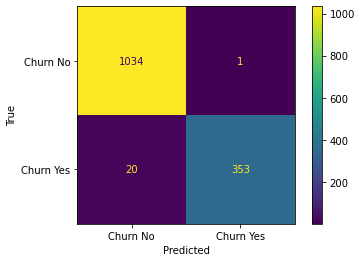

In [15]:
# Soft Voting (Test)

y_pred = eclf_s.predict(X_test)
print(f1_score(y_test, y_pred)) # 97.11%

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Churn No', 'Churn Yes'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')